# EDA 기초

지난 시간에는 PCA와 같은 몇몇 시각화 툴과 더불어 그래프의 용례에 대해 살펴보았습니다.

오늘은 본격적으로 시각화를 해보는 시간을 갖도록 할텐데요,

그 전에 지난 시간에 빠진 부분에 대해 살펴보고 넘어가도록 하겠습니다.

[[링크]](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

PCA에 대해 더 자세히 알고 싶으신 분은 아래 링크를 참조하시기 바랍니다.

[[링크]](https://pca4ds.github.io/)

## Unit 7. 시각화

Fundamental 9~11과 아래 링크를 참조해 진행해주세요

[Matplotlib](https://wikidocs.net/book/5011)

오늘 데이터는 Fund 5의 과제로 나온 데이터입니다. 데이터에 대한 자세한 설명은 아래 링크를 참조해주세요.

[Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)

### 조별과제 1

조별로 힘을 합쳐 아래 노트북을 완성해주세요!

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

import os

In [2]:
train = pd.read_csv('{}/aiffel/bike_sharing_demand_train.csv'.format(os.getenv('HOME')))
test = pd.read_csv('{}/aiffel/bike_sharing_demand_test.csv'.format(os.getenv('HOME')))
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Step 1. 타입 변경

**Fundamental 5. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?** 를 참조하여 datetime 컬럼의 데이터타입을 변경해주세요.



In [4]:
train_copy = train.copy()
test_copy = test.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# <YOUR CODE>
train_copy['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [7]:
train_copy['datetime'] = pd.to_datetime(train_copy['datetime'])

In [8]:
train_copy['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [9]:
test_copy['datetime'] = pd.to_datetime(test_copy['datetime'])

### Step 2. 결측치 탐색

데이터를 살펴보다보면 datetime 컬럼에 info()만으로 발견할 수 없었던 결측치가 있을 것입니다.

그러한 결측치가 있다면 어떻게 채워넣을지 토의해보고 구현해봅시다.

In [10]:
## isna()로는 검출 x >> 데이터 하나씩 확인 필요
train_copy.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
## datetime64
## 각 행의 날짜 데이터가 한시간 차이가 아닌 행의 index 추출하는 for loop
import datetime
count = 0
for i in range(len(train_copy))[1:]:
    if train_copy['datetime'][i] - datetime.timedelta(hours=1) != train_copy['datetime'][i-1]:
        print(i)
        count+=1

29
49
72
95
118
141
236
258
305
396
411
431
435
482
505
624
646
669
717
762
784
877
1002
1022
1094
1117
1162
1187
1209
1231
1280
1323
1566
1778
2234
2690
3146
3602
3723
3771
3867
4055
4490
4510
4966
5422
5449
5640
5807
5875
5998
6330
6572
6785
6812
7028
7239
7695
8151
8607
9063
9519
9975
10146
10430


In [12]:
count

65

In [13]:
## kaggle 과 데이터 확인 결과 train은 한달에 1일부터 19일까지 존재 test는 한달에 20일 부터 존재
## 여기에 각 값들의 결측값가 추가적으로 존재
train_copy[0::19*24]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
456,2011-02-02 02:00:00,1,0,1,3,9.02,11.365,93,8.9981,4,0,4
912,2011-03-02 11:00:00,1,0,1,1,13.94,15.150,53,22.0028,8,65,73
1368,2011-04-02 21:00:00,2,0,0,1,13.12,15.150,61,16.9979,24,53,77
1824,2011-05-02 22:00:00,2,0,1,2,24.60,29.545,73,0.0000,28,97,125
2280,2011-06-02 22:00:00,2,0,1,1,26.24,31.060,33,16.9979,14,141,155
2736,2011-07-02 22:00:00,3,0,0,1,29.52,33.335,51,11.0014,78,123,201
3192,2011-08-02 22:00:00,3,0,1,2,31.98,37.120,59,11.0014,22,169,191
3648,2011-09-02 22:00:00,3,0,1,2,26.24,30.305,73,11.0014,33,114,147
4104,2011-10-03 01:00:00,4,0,1,1,14.76,18.180,81,6.0032,1,5,6


In [14]:
## train과 test를 합쳐 하나의 df로 만들어 전체 날자에 대해 결측값 처리 후 다시 분할(한울님 아이디어)
data_set = pd.concat((train_copy,test_copy),axis=0)

In [15]:
data_set.sort_values('datetime',inplace = True)

In [16]:
data_set.iloc[0::19*24]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
25,2011-01-21 01:00:00,1,0,1,2,9.84,11.365,70,16.9979,NaN,NaN,NaN
655,2011-02-10 13:00:00,1,0,1,1,7.38,8.335,29,19.9995,3.0,59.0,62.0
908,2011-03-02 07:00:00,1,0,1,1,9.02,10.605,64,16.9979,2.0,108.0,110.0
501,2011-03-21 18:00:00,2,0,1,2,21.32,25.000,72,15.0013,NaN,NaN,NaN
1536,2011-04-09 21:00:00,2,0,0,2,14.76,17.425,93,8.9981,10.0,65.0,75.0
958,2011-04-28 22:00:00,2,0,1,1,22.14,25.760,45,11.0014,NaN,NaN,NaN
2184,2011-05-17 22:00:00,2,0,1,2,22.14,25.760,88,19.0012,12.0,86.0,98.0
2352,2011-06-05 22:00:00,2,0,0,1,26.24,29.545,78,15.0013,36.0,94.0,130.0
1414,2011-06-24 22:00:00,3,0,1,1,28.70,32.575,48,0.0000,NaN,NaN,NaN


In [17]:
data_set.reset_index(drop=True, inplace =True)

In [18]:
## solution_1(성훈님 아이디어)
## for loop (모든 데이터)
## 0 datetime이 1 hour가 차이나지 않는 곳의 인덱스를 추출
## 추출한 인덱스를 기준으로 두 개의 배열로 분할
## 분할한 배열에 한칸을 추가하고 다시 두개의 배열 stack
## datetime 값에는 1 hour를 추가한 datetime 값 입력 

for i in range(len(data_set))[1:]:
    if data_set['datetime'][i] - datetime.timedelta(hours=1) != data_set['datetime'][i-1]:
        print(i)
        a= data_set.iloc[:i,:]
        b = data_set.iloc[i:,:]
        a.append([])
        a['datetime'].iloc[-1] = a['datetime'].iloc[-2]+datetime.timedelta(hours=1)
        
        data_set = pd.concat((a,b))
        

29
49
72
95
118
141
236
258
305
396
411
484
506
527
551
574
587
599
623
647
692
739
762
881
903
926
974
1019
1041
1139
1181
1203
1226
1249
1297
1317
1318
1462
1482
1554
1577
1622
1647
1669
1691
1740
1811
1858
1954
1976
2310


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


5636
5846
5894
5990
6877
7835
8484
8506
8554
8672
8863
9030
9509
9845
9867
10059
10320
10848
11064
15884
16090
16593
17193
17215


In [19]:
data_set.head(50)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2.0,0.0,2.0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1.0,2.0,3.0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1.0,7.0,8.0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8.0,6.0,14.0


In [20]:
## solution_2
## 정적 할당
## start date와 end date간의 차이를 구해 빈 배열 생성 shape = (len(data_set),1)
## datetime 데이터 생성후 할당
## 기존 데이터의 datetime과 dummy배열의 datetime 비교후 같으면 각 데이터 값 삽입(pd.merge 사용)

start_date = data_set['datetime'].iloc[0]
end_date = data_set['datetime'].iloc[-1]

print(start_date,end_date)

dummy_size = (end_date - start_date)/datetime.timedelta(hours=1)
print(dummy_size)



2011-01-01 00:00:00 2012-12-31 23:00:00
17543.0


In [21]:
dummy_array = pd.DataFrame(np.zeros(int(dummy_size)).reshape(int(dummy_size),-1))

In [22]:
dummy_array.columns = ['datetime']

In [23]:
dummy_array['datetime'] = [start_date+datetime.timedelta(hours = x) for x in range(len(dummy_array))]

In [24]:
dummy_array

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
17538,2012-12-31 18:00:00
17539,2012-12-31 19:00:00
17540,2012-12-31 20:00:00
17541,2012-12-31 21:00:00


In [25]:
data_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [26]:
data_set2=pd.merge(dummy_array,data_set,how = 'left')

In [27]:
data_set2.head(50)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0
5,2011-01-01 05:00:00,1.0,0.0,0.0,2.0,9.84,12.880,75.0,6.0032,0.0,1.0,1.0
6,2011-01-01 06:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,2.0,0.0,2.0
7,2011-01-01 07:00:00,1.0,0.0,0.0,1.0,8.20,12.880,86.0,0.0000,1.0,2.0,3.0
8,2011-01-01 08:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,1.0,7.0,8.0
9,2011-01-01 09:00:00,1.0,0.0,0.0,1.0,13.12,17.425,76.0,0.0000,8.0,6.0,14.0


In [28]:
data_set2 = data_set2.fillna(method = 'ffill')


In [29]:
## data_set split to train, test
## 날짜 데이터에서 몇일인지 추출해서 column화
## loc 을 이용해서 19일 기준을 train test split
data_set2['day'] = data_set2['datetime'].dt.day

In [30]:
data_set2['day']

0         1
1         1
2         1
3         1
4         1
         ..
17538    31
17539    31
17540    31
17541    31
17542    31
Name: day, Length: 17543, dtype: int64

In [31]:
train_set2 = data_set2.loc[data_set2['day']<20,:]
test_set2 = data_set2.loc[data_set2['day']>=20,:]

In [32]:
train_set2.iloc[0::19*24]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0,1
744,2011-02-01,1.0,0.0,1.0,2.0,6.56,9.090,64.0,7.0015,2.0,6.0,8.0,1
1416,2011-03-01,1.0,0.0,1.0,1.0,12.30,13.635,70.0,31.0009,0.0,7.0,7.0,1
2160,2011-04-01,2.0,0.0,1.0,3.0,10.66,12.880,100.0,11.0014,0.0,6.0,6.0,1
2880,2011-05-01,2.0,0.0,0.0,1.0,17.22,21.210,67.0,6.0032,19.0,77.0,96.0,1
3624,2011-06-01,2.0,0.0,1.0,1.0,28.70,33.335,79.0,11.0014,9.0,25.0,34.0,1
4344,2011-07-01,3.0,0.0,1.0,1.0,27.06,31.060,50.0,0.0000,20.0,48.0,68.0,1
5088,2011-08-01,3.0,0.0,1.0,1.0,29.52,34.090,70.0,15.0013,7.0,22.0,29.0,1
5832,2011-09-01,3.0,0.0,1.0,1.0,24.60,28.790,78.0,7.0015,18.0,33.0,51.0,1
6552,2011-10-01,4.0,0.0,0.0,1.0,20.50,24.240,63.0,26.0027,24.0,106.0,130.0,1


In [33]:
train_set2.reset_index(drop=True,inplace=True)
test_set2.reset_index(drop=True,inplace=True)

In [34]:
train_set2.drop(columns=['day'],inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
test_set2.drop(columns=['day'],inplace=True)

### Step 3. 데이터 생성

데이터의 세부 정보를 확인하면 holiday와 workingday가 아래와 같이 서술되어있습니다.

holiday; whether the day is considered a holiday

workingday; whether the day is neither a weekend nor holiday

정작 그런데 정작 weekend 데이터 컬럼은 없군요?

이게 없어도 되는지, 혹은 있어야 좋을지 토론을 해본 후 필요하다고 생각되면 weekend 컬럼을 생성해주세요. 만일 필요가 없다면 생략해도 됩니다.

혹은 기타 다른 데이터를 생성하고 싶다면 이번 step에서 생성해주세요.

# 자전거 렌트 Count 예측하기

## 프로젝트 목적 : 자전거의 수요를 예측하여 자전거의 수 등 수요 대응형 서비스 구축

### 가정
    1. 자전거 렌트는 출퇴근 시간에 증가할 것이다  
    2. 자전거 렌트는 주중보단 주말에 증가할 것이다  
    3. 자전거 렌트는 습도가 높으면 감소할 것이다  
    4. 자전거 렌트는 바람이 많이 불면 감소할 것이다  
    5. 자전거 렌트는 여름, 겨울보다는 봄, 가을에 증가할 것이다
    6. 자전거 렌트는 특정 휴일에 증가할 것이다(어린이날, 발렌타인 데이, 화이트 데이)

In [163]:
train_set2['tem_diff'] = train_set2.atemp-train_set2.temp
test_set2['tem_diff'] =  test_set2.atemp-test_set2.temp

/tmp/ipykernel_41/2512606214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set2['tem_diff'] = train_set2.atemp-train_set2.temp
/tmp/ipykernel_41/2512606214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set2['tem_diff'] =  test_set2.atemp-test_set2.temp


In [164]:
# <YOUR CODE>

train_set2['weekend'] = [0 if x <5 else 1 for x in train_set2['datetime'].dt.weekday]
test_set2['weekend'] = [0 if x <5 else 1 for x in test_set2['datetime'].dt.weekday]

/tmp/ipykernel_41/1788884657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set2['weekend'] = [0 if x <5 else 1 for x in train_set2['datetime'].dt.weekday]
/tmp/ipykernel_41/1788884657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set2['weekend'] = [0 if x <5 else 1 for x in test_set2['datetime'].dt.weekday]


In [169]:
train_set2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend,tem_diff
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0,1,4.555
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0,1,4.615
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0,1,4.615
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0,1,4.555
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0,1,4.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,2012-12-19 19:00:00,4.0,0.0,1.0,1.0,15.58,19.695,50.0,26.0027,7.0,329.0,336.0,0,4.115
10940,2012-12-19 20:00:00,4.0,0.0,1.0,1.0,14.76,17.425,57.0,15.0013,10.0,231.0,241.0,0,2.665
10941,2012-12-19 21:00:00,4.0,0.0,1.0,1.0,13.94,15.910,61.0,15.0013,4.0,164.0,168.0,0,1.970
10942,2012-12-19 22:00:00,4.0,0.0,1.0,1.0,13.94,17.425,61.0,6.0032,12.0,117.0,129.0,0,3.485


In [170]:
test_set2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend,tem_diff
0,2011-01-20 00:00:00,1.0,0.0,1.0,1.0,10.66,11.365,56.0,26.0027,1.0,27.0,28.0,0,0.705
1,2011-01-20 01:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1.0,27.0,28.0,0,2.975
2,2011-01-20 02:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1.0,27.0,28.0,0,2.975
3,2011-01-20 03:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1.0,27.0,28.0,0,2.220
4,2011-01-20 04:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1.0,27.0,28.0,0,2.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,2012-12-31 18:00:00,1.0,0.0,1.0,2.0,10.66,13.635,48.0,8.9981,4.0,84.0,88.0,0,2.975
6595,2012-12-31 19:00:00,1.0,0.0,1.0,2.0,10.66,12.880,60.0,11.0014,4.0,84.0,88.0,0,2.220
6596,2012-12-31 20:00:00,1.0,0.0,1.0,2.0,10.66,12.880,60.0,11.0014,4.0,84.0,88.0,0,2.220
6597,2012-12-31 21:00:00,1.0,0.0,1.0,1.0,10.66,12.880,60.0,11.0014,4.0,84.0,88.0,0,2.220


### 가정 1 자전거 렌트는 출퇴근 시간에 증가할 것이다  
* workingday X
* 07~10, 17~20


In [171]:
train_set3 = train_set2.copy()
test_set3 = test_set2.copy()

In [172]:
train_set3['hour'] = train_set3['datetime'].dt.time
test_set3['hour'] = test_set3['datetime'].dt.time

In [173]:
train_set3.groupby(['hour'])['count'].mean()

hour
00:00:00     55.026316
01:00:00     33.736842
02:00:00     22.756579
03:00:00     11.355263
04:00:00      6.278509
05:00:00     19.620614
06:00:00     76.100877
07:00:00    212.657895
08:00:00    361.982456
09:00:00    221.302632
10:00:00    174.717105
11:00:00    210.221491
12:00:00    256.508772
13:00:00    257.787281
14:00:00    243.442982
15:00:00    254.298246
16:00:00    316.372807
17:00:00    468.765351
18:00:00    430.859649
19:00:00    315.278509
20:00:00    228.517544
21:00:00    173.370614
22:00:00    133.576754
23:00:00     89.508772
Name: count, dtype: float64

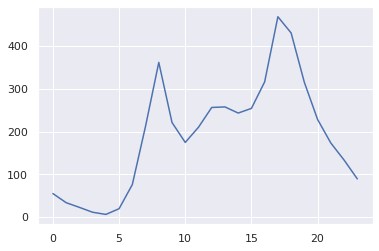

In [174]:
plt.plot(list(range(0,24)),train_set3.groupby(['hour'])['count'].mean() )

### 가정1 확인
1. datetime에서 time만 추출하여 입력



### 가정 2. 자전거 렌트는 주중보단 주말에 증가할 것이다

In [57]:
train_set3.groupby(['workingday'])['count'].mean()

workingday
0.0    187.579897
1.0    191.993425
Name: count, dtype: float64

### 가정2 기각
1. 현재 데이터 형태로 유지해도 상관 없음`

### 가정 3 자전거 렌트는 습도가 높으면 감소할 것이다  

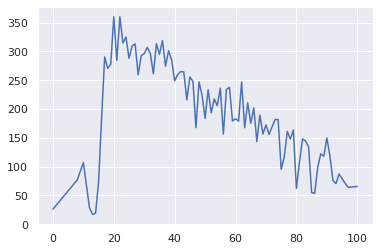

In [175]:
plt.plot(train_set3.groupby(['humidity'])['count'].mean())

In [176]:
train_set3.sort_values('humidity').head(50)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend,tem_diff,hour
1151,2011-03-10 23:00:00,1.0,0.0,1.0,3.0,13.94,17.425,0.0,6.0032,1.0,26.0,27.0,0,3.485,23:00:00
1141,2011-03-10 13:00:00,1.0,0.0,1.0,3.0,17.22,21.210,0.0,15.0013,1.0,11.0,12.0,0,3.990,13:00:00
1130,2011-03-10 02:00:00,1.0,0.0,1.0,3.0,13.94,15.910,0.0,16.9979,0.0,1.0,1.0,0,1.970,02:00:00
1131,2011-03-10 03:00:00,1.0,0.0,1.0,3.0,13.94,15.910,0.0,16.9979,0.0,1.0,1.0,0,1.970,03:00:00
1132,2011-03-10 04:00:00,1.0,0.0,1.0,3.0,13.94,15.910,0.0,16.9979,0.0,1.0,1.0,0,1.970,04:00:00
1145,2011-03-10 17:00:00,1.0,0.0,1.0,2.0,18.04,21.970,0.0,26.0027,2.0,109.0,111.0,0,3.930,17:00:00
1144,2011-03-10 16:00:00,1.0,0.0,1.0,3.0,17.22,21.210,0.0,16.9979,1.0,20.0,21.0,0,3.990,16:00:00
1143,2011-03-10 15:00:00,1.0,0.0,1.0,3.0,18.04,21.970,0.0,15.0013,3.0,11.0,14.0,0,3.930,15:00:00
1142,2011-03-10 14:00:00,1.0,0.0,1.0,3.0,18.04,21.970,0.0,19.9995,0.0,12.0,12.0,0,3.930,14:00:00
1133,2011-03-10 05:00:00,1.0,0.0,1.0,3.0,14.76,17.425,0.0,12.9980,1.0,2.0,3.0,0,2.665,05:00:00


### 가정 3 판단 보류


### 가정 4. 자전거 렌트는 바람이 많이 불면 감소할 것이다  

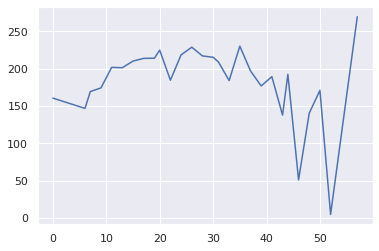

In [177]:
plt.plot(train_set3.groupby(['windspeed'])['count'].mean())

### 가정 4  상관성을 확인하기 어렵다

### 가정 5. 자전거 렌트는 여름, 겨울보다는 봄, 가을에 증가할 것이다

In [178]:
# 계절 별 자전거 이용수 histgram
train_set3.groupby(['season'])['count'].mean()

season
1.0    114.306652
2.0    215.021199
3.0    234.165205
4.0    198.847588
Name: count, dtype: float64

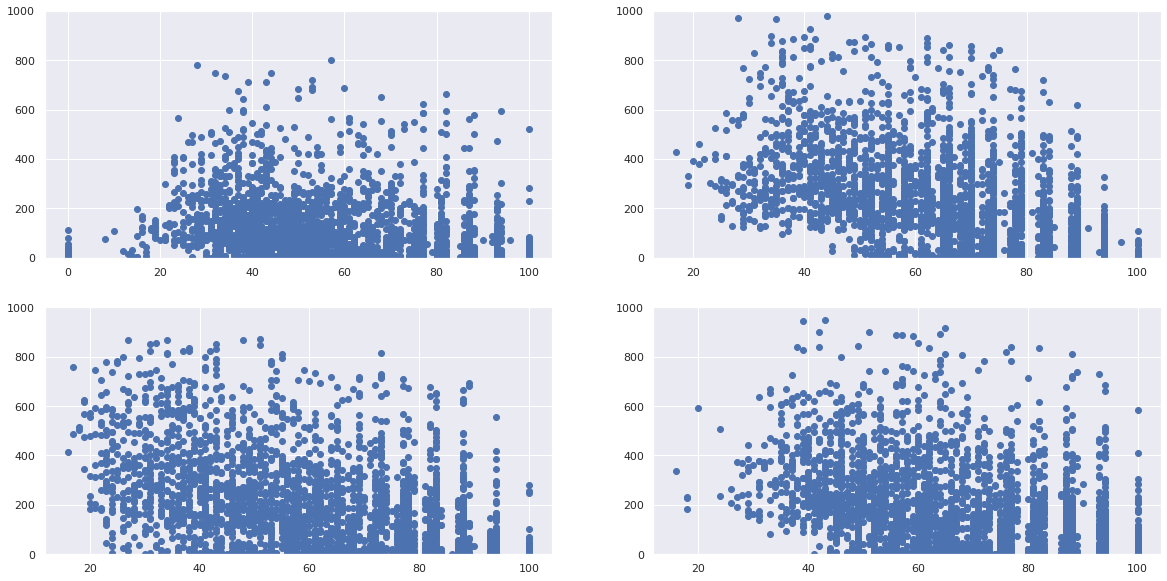

In [179]:
fig,axes = plt.subplots(2,2,figsize=(20,10))

for i in range(4):
    axes[i%2,i//2].scatter(train_set3.loc[train_set3['season']==i+1,'humidity'],train_set3.loc[train_set3['season']==i+1,'count'])
    axes[i%2,i//2].set_ylim([0,1000])

/tmp/ipykernel_41/2613597201.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')


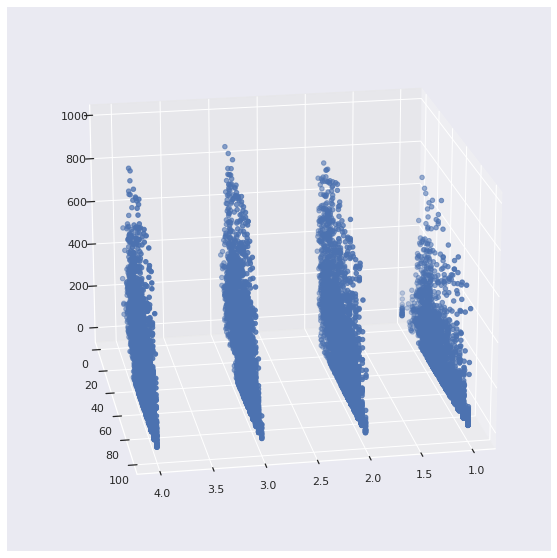

In [180]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(train_set3['season'],train_set3['humidity'],train_set3['count'])
ax1.view_init(20, 80)

### 가정 5 기각
* 데이터 지역인 워싱턴의 계절적 특성이 다름

### Step 4. 시각화를 통한 EDA

본 풀잎에서는 다루지 않았지만(노드에서는 등장) binning 역시 DS에서 상당히 많이 사용되는 스킬 중 하나입니다. 아래 링크를 통해서 binning의 역할에 대해서 함께 살펴봅시다.

[링크](https://m.blog.naver.com/gksshdk8003/221517070898)

In [182]:
train_set3.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'weekend', 'tem_diff', 'hour'],
      dtype='object')

(array([1.317e+03, 4.104e+03, 2.839e+03, 1.555e+03, 7.000e+02, 2.810e+02,
        1.070e+02, 3.100e+01, 7.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

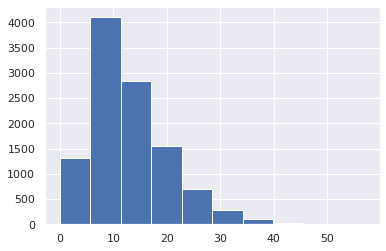

In [183]:
plt.hist(train_set3['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda12a62370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda12a62a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda12a84fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda12a961f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda12a96580>],
 'means': []}

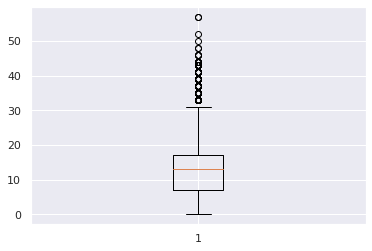

In [184]:
plt.boxplot(train_set3['windspeed'])

In [185]:
corr = train_set3.corr()
corr.style.background_gradient(cmap='coolwarm')


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend,tem_diff
season,1.000000,0.020252,-0.007364,0.003915,0.265253,0.271513,0.186895,-0.147243,0.100372,0.168761,0.168335,-0.000000,0.150567
holiday,0.020252,1.000000,-0.255158,0.008036,-0.010198,-0.017106,0.008790,0.014122,0.038611,-0.026627,-0.011565,-0.111487,-0.041930
workingday,-0.007364,-0.255158,1.000000,0.030566,0.030041,0.025089,-0.012475,0.011585,-0.317983,0.118661,0.011356,-0.932425,-0.013627
weather,0.003915,0.008036,0.030566,1.000000,-0.060060,-0.061133,0.407071,0.009833,-0.137989,-0.112861,-0.132091,-0.034418,-0.032227
temp,0.265253,-0.010198,0.030041,-0.060060,1.000000,0.985059,-0.066810,-0.018568,0.468723,0.322835,0.398225,-0.027064,0.358742
atemp,0.271513,-0.017106,0.025089,-0.061133,0.985059,1.000000,-0.045731,-0.058452,0.463705,0.319098,0.393727,-0.019393,0.514135
humidity,0.186895,0.008790,-0.012475,0.407071,-0.066810,-0.045731,1.000000,-0.316662,-0.347935,-0.266047,-0.317617,0.009536,0.084872
windspeed,-0.147243,0.014122,0.011585,0.009833,-0.018568,-0.058452,-0.316662,1.000000,0.091316,0.089705,0.099933,-0.017185,-0.224339
casual,0.100372,0.038611,-0.317983,-0.137989,0.468723,0.463705,-0.347935,0.091316,1.000000,0.499006,0.691405,0.312388,0.178908
registered,0.168761,-0.026627,0.118661,-0.112861,0.322835,0.319098,-0.266047,0.089705,0.499006,1.000000,0.971104,-0.112007,0.121703


In [186]:
corr = train_set3[['temp','atemp','humidity','windspeed','count']].corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.985059,-0.066810,-0.018568,0.398225
atemp,0.985059,1.000000,-0.045731,-0.058452,0.393727
humidity,-0.066810,-0.045731,1.000000,-0.316662,-0.317617
windspeed,-0.018568,-0.058452,-0.316662,1.000000,0.099933
count,0.398225,0.393727,-0.317617,0.099933,1.000000


 Step 4는 다시 돌아올 예정입니다. 아래 두가지 과제를 한 뒤 넘어가기 바랍니다. 다시 돌아왔다면 원하는 대로 시각화와 EDA를 진행해보시기 바랍니다.
 
 1. datetime을 원하는대로 binning하고(새벽,오전,오후,밤 / 일일 / 주 등...) binning의 효과를 잘 보여줄 수 있는 그래프를 선택해 그려주세요.

In [ ]:
# <YOUR CODE>

  2. temp, humidity, windspeed를 각각 축으로 삼는 산점도(혹은 저 중 두개를 두 축으로 삼는 산점도)를 그리고 표기되는 데이터(점)의 크기는 count의 크기를 반영하도록 만드시오.

In [ ]:
# <YOUR CODE>

# Step 5. 예측하기

충분히 EDA가 진행되었다면 bike_sharing_demand_train.csv 에서 적당한 데이터를 선별하여 X로 두고 y는 count 컬럼으로 삼아 예측하고 bike_sharing_demand_test.csv 에 count 컬럼을 생성하여 채워넣어봅시다.

### arima
### RNN
### LSTM
### SVM
### RF
### 

In [187]:
train_set3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend,tem_diff,hour
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0,1,4.555,00:00:00
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0,1,4.615,01:00:00
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0,1,4.615,02:00:00
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0,1,4.555,03:00:00
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0,1,4.555,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,2012-12-19 19:00:00,4.0,0.0,1.0,1.0,15.58,19.695,50.0,26.0027,7.0,329.0,336.0,0,4.115,19:00:00
10940,2012-12-19 20:00:00,4.0,0.0,1.0,1.0,14.76,17.425,57.0,15.0013,10.0,231.0,241.0,0,2.665,20:00:00
10941,2012-12-19 21:00:00,4.0,0.0,1.0,1.0,13.94,15.910,61.0,15.0013,4.0,164.0,168.0,0,1.970,21:00:00
10942,2012-12-19 22:00:00,4.0,0.0,1.0,1.0,13.94,17.425,61.0,6.0032,12.0,117.0,129.0,0,3.485,22:00:00


In [188]:
test_set3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekend,tem_diff,hour
0,2011-01-20 00:00:00,1.0,0.0,1.0,1.0,10.66,11.365,56.0,26.0027,1.0,27.0,28.0,0,0.705,00:00:00
1,2011-01-20 01:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1.0,27.0,28.0,0,2.975,01:00:00
2,2011-01-20 02:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1.0,27.0,28.0,0,2.975,02:00:00
3,2011-01-20 03:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1.0,27.0,28.0,0,2.220,03:00:00
4,2011-01-20 04:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1.0,27.0,28.0,0,2.220,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,2012-12-31 18:00:00,1.0,0.0,1.0,2.0,10.66,13.635,48.0,8.9981,4.0,84.0,88.0,0,2.975,18:00:00
6595,2012-12-31 19:00:00,1.0,0.0,1.0,2.0,10.66,12.880,60.0,11.0014,4.0,84.0,88.0,0,2.220,19:00:00
6596,2012-12-31 20:00:00,1.0,0.0,1.0,2.0,10.66,12.880,60.0,11.0014,4.0,84.0,88.0,0,2.220,20:00:00
6597,2012-12-31 21:00:00,1.0,0.0,1.0,1.0,10.66,12.880,60.0,11.0014,4.0,84.0,88.0,0,2.220,21:00:00


In [189]:
col = train_set3.columns[1:]

In [190]:
col.drop(['casual','registered','count'])

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'weekend', 'tem_diff', 'hour'],
      dtype='object')

In [207]:
train_set3['hour']=[int(x[:2]) for x in train_set3['hour'].astype(str)]
test_set3['hour']=[int(x[:2]) for x in test_set3['hour'].astype(str)]

In [ ]:
tra

In [208]:

x_train = train_set3[col.drop(['casual','registered','count'])]
y_train = train_set3['count']
x_test = train_set3[col.drop(['casual','registered','count'])]
y_test = train_set3['count']

In [194]:
x_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekend,tem_diff,hour
0,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,1,4.555,00:00:00
1,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,1,4.615,01:00:00
2,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,1,4.615,02:00:00
3,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,1,4.555,03:00:00
4,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,1,4.555,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
10939,4.0,0.0,1.0,1.0,15.58,19.695,50.0,26.0027,0,4.115,19:00:00
10940,4.0,0.0,1.0,1.0,14.76,17.425,57.0,15.0013,0,2.665,20:00:00
10941,4.0,0.0,1.0,1.0,13.94,15.910,61.0,15.0013,0,1.970,21:00:00
10942,4.0,0.0,1.0,1.0,13.94,17.425,61.0,6.0032,0,3.485,22:00:00


In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

KeyError: 'count'

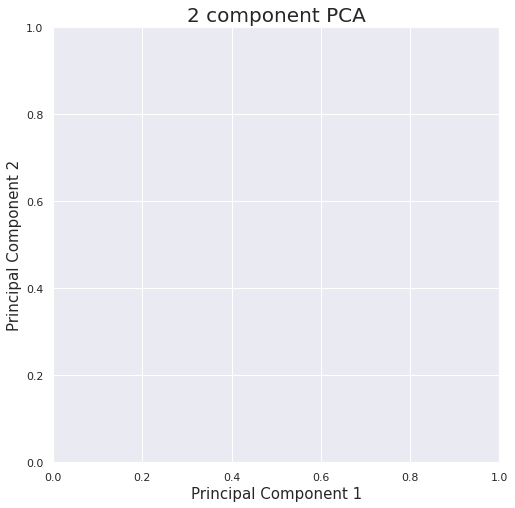

In [214]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['count']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['count'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
#ax.legend()
ax.grid()

어떤 결과가 나왔나요?

Step 4로 돌아가 EDA를 진행하며 찾아낸 적절한 컬럼을 골라 성능을 개선시켜봅시다.

### Step 6. (보너스) 성능 개선

어쩌면 casual와 registered는 각기 다른 요소의 영향을 받을지도 모르겠습니다. casual와 registered를 따로 예측하고 그 합산이 count가 되도록 Step 5를 반복해주세요.

혹은 [casual, registered, count]라는 벡터를 예측하는 것도 재밌을 겁니다.

In [ ]:
# <YOUR CODE>